<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/rock-paper-scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive

In [ ]:
zip_id = '1gvn-ya2HFXFrZjtDN0tflOzsE_1-93LD'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')


In [ ]:
# 2. Download Zip
print ("Downloading zip file")
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('rps.zip')

In [ ]:
# 3. Unzip
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('rps.zip', 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

Uncompressing zip file


In [ ]:
rock_dir = os.path.join('tmp/rps/rock')
paper_dir = os.path.join('tmp/rps/paper')
scissors_dir = os.path.join('tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-066.png', 'rock06ck02-107.png', 'rock04-071.png', 'rock05ck01-058.png', 'rock04-074.png', 'rock07-k03-036.png', 'rock01-057.png', 'rock07-k03-106.png', 'rock07-k03-102.png', 'rock01-108.png']
['paper07-060.png', 'paper01-111.png', 'paper04-000.png', 'paper02-115.png', 'paper07-020.png', 'paper07-026.png', 'paper02-014.png', 'paper01-072.png', 'paper07-105.png', 'paper04-032.png']
['scissors03-071.png', 'scissors04-084.png', 'testscissors03-114.png', 'scissors04-005.png', 'testscissors02-114.png', 'scissors02-002.png', 'scissors02-119.png', 'testscissors03-003.png', 'scissors04-109.png', 'testscissors01-076.png']


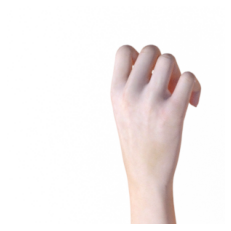

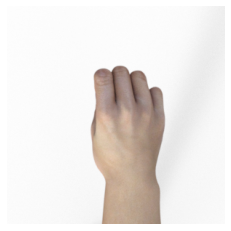

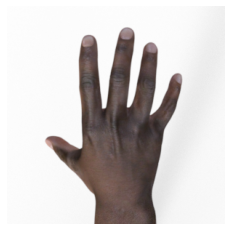

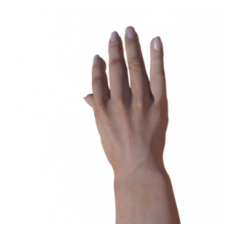

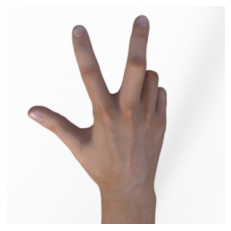

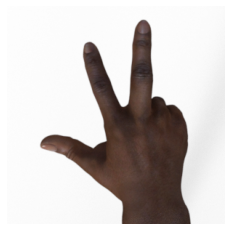

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
zip_id = '1f5w9uGk-IqWN0zze-oF8kfE2Eilkoy7x'

In [ ]:
# 2. Download Zip
print ("Downloading zip file")
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('rps-test-set.zip')

In [ ]:
# 3. Unzip
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('rps-test-set.zip', 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

Uncompressing zip file


In [ ]:
# Over to test data for validation
rock_dir = os.path.join('tmp/rps-test-set/rock')
paper_dir = os.path.join('tmp/rps-test-set/paper')
scissors_dir = os.path.join('tmp/rps-test-set/scissors')

print('total testing rock images:', len(os.listdir(rock_dir)))
print('total testing paper images:', len(os.listdir(paper_dir)))
print('total testing scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total testing rock images: 124
total testing paper images: 124
total testing scissors images: 124
['testrock02-27.png', 'testrock01-13.png', 'testrock01-02.png', 'testrock01-20.png', 'testrock02-17.png', 'testrock02-11.png', 'testrock01-01.png', 'testrock01-17.png', 'testrock01-21.png', 'testrock03-11.png']
['testpaper02-12.png', 'testpaper03-08.png', 'testpaper02-19.png', 'testpaper03-00.png', 'testpaper04-10.png', 'testpaper04-23.png', 'testpaper03-14.png', 'testpaper03-20.png', 'testpaper01-08.png', 'testpaper01-15.png']
['testscissors03-16.png', 'testscissors02-25.png', 'testscissors01-24.png', 'testscissors03-00.png', 'testscissors01-28.png', 'testscissors02-11.png', 'testscissors01-21.png', 'testscissors04-01.png', 'testscissors03-11.png', 'testscissors04-04.png']


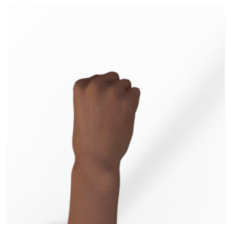

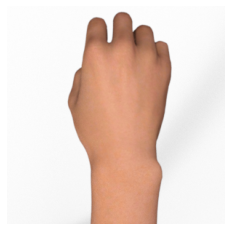

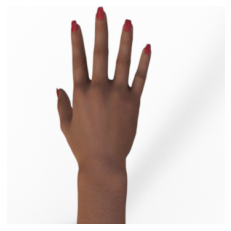

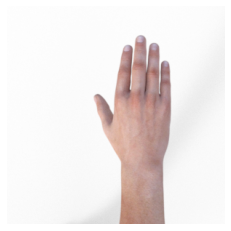

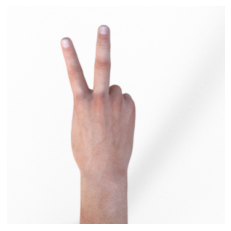

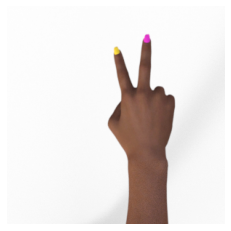

In [ ]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR = "tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/5
79/79 [==============================] - 27s 332ms/step - loss: 1.1956 - accuracy: 0.3377 - val_loss: 1.0830 - val_accuracy: 0.5081
Epoch 2/5
79/79 [==============================] - 26s 324ms/step - loss: 1.0349 - accuracy: 0.4639 - val_loss: 0.4864 - val_accuracy: 0.8629
Epoch 3/5
79/79 [==============================] - 26s 326ms/step - loss: 0.7079 - accuracy: 0.6833 - val_loss: 0.3601 - val_accuracy: 0.9382
Epoch 4/5
79/79 [==============================] - 26s 325ms/step - loss: 0.4657 - accuracy: 0.8079 - val_loss: 0.1079 - val_accuracy: 0.9651
Epoch 5/5
79/79 [==============================] - 26s 325ms/step - loss: 0.3043 - accuracy: 0.8802 - val_loss: 0.1497 - val_accuracy: 0.9677


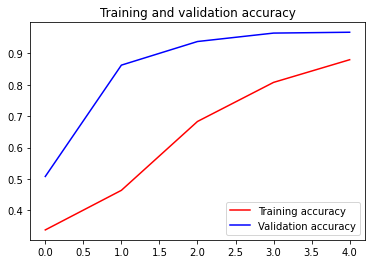

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving testpaper04-21.png to testpaper04-21.png
testpaper04-21.png
[[1. 0. 0.]]
